/Users/wakeliu/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


0 [ 0.39501381] [ 0.06069889]


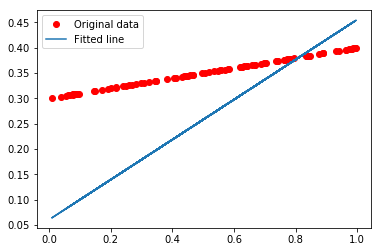

20 [ 0.29257685] [ 0.18741618]


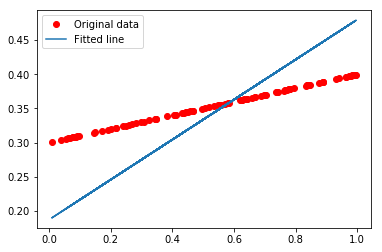

40 [ 0.21441576] [ 0.23311053]


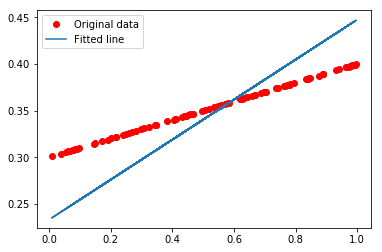

60 [ 0.16797793] [ 0.26025891]


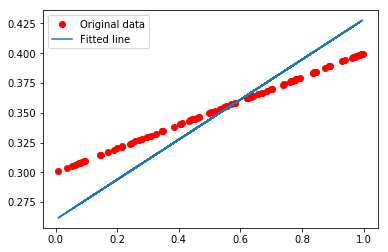

80 [ 0.14038777] [ 0.27638862]


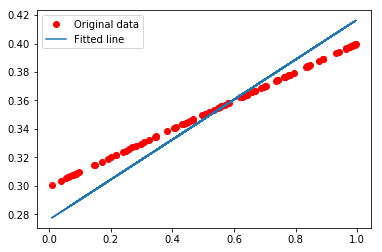

100 [ 0.12399559] [ 0.28597176]


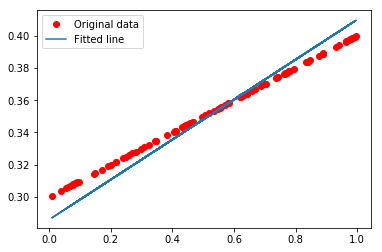

120 [ 0.11425652] [ 0.29166541]


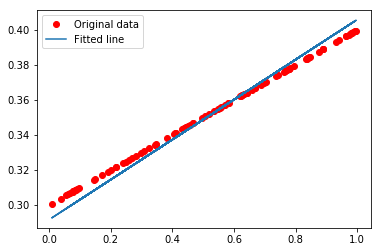

140 [ 0.10847025] [ 0.29504815]


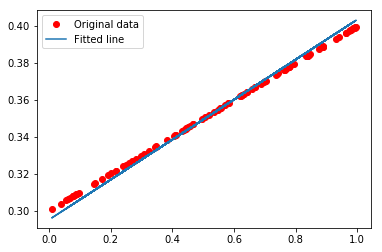

160 [ 0.10503245] [ 0.29705796]


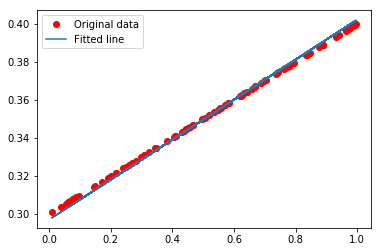

180 [ 0.10298995] [ 0.29825205]


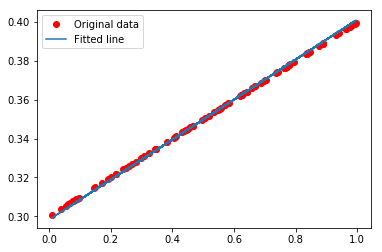

200 [ 0.10177641] [ 0.29896149]


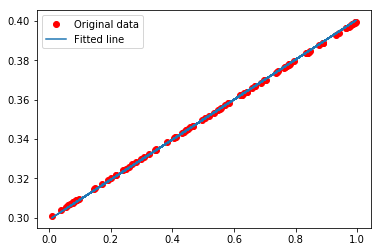

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 用 numpy 亂數產生 100 個點，並且
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
# 等等 tensorflow 幫我們慢慢地找出 fitting 的權重值

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

# Learns best fit is W: [0.1], b: [0.3]
